# **Import librares**

In [1]:
!pip install Keras-Preprocessing
import numpy as np
import pandas as pd
import nltk
import tensorflow as tf
from nltk.corpus import stopwords
from nltk.corpus import reuters
from nltk.corpus import brown
from nltk.corpus import gutenberg
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle
import joblib
from collections import Counter
from textblob import Word
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, recall_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras_preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.layers import Activation, Dense, Embedding, LSTM, SpatialDropout1D, Dropout, Flatten, GRU, Conv1D, MaxPooling1D, Bidirectional
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests
from keras.regularizers import l2
!pip install ktrain
import ktrain
from ktrain import text
sns.set()
%matplotlib inline
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('gutenberg')
nltk.download('brown')
nltk.download("reuters")
nltk.download('words')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 748.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 38.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 41.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.6/653.6 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 61.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 37.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

### **Load Dataset**

In [2]:
df=pd.read_csv("/content/Twitter_Suicide_Dataset.csv", engine='python', encoding='UTF-8')
df=df.replace('Potential Suicide post ','Potential Suicide post')
df

,Tweet,Suicide
0,making some lunch,Not Suicide post
1,@Alexia You want his money.,Not Suicide post
2,@dizzyhrvy that crap took me forever to put to...,Potential Suicide post
3,@jnaylor #kiwitweets Hey Jer! Since when did y...,Not Suicide post
4,Trying out &quot;Delicious Library 2&quot; wit...,Not Suicide post
...,...,...
1782,i have forgotten how much i love my Nokia N95-1,Not Suicide post
1783,Starting my day out with a positive attitude! ...,Not Suicide post
1784,"@belledame222 Hey, it's 5 am...give a girl som...",Not Suicide post
1785,2 drunken besties stumble into my room and we ...,Not Suicide post


# **Data Cleaning**

In [4]:
df['Tweet']=df['Tweet'].fillna("")
df.isna().sum()

Tweet      0
Suicide    0
dtype: int64

# **Preprocessing**

In [5]:
#Convert to lower case
df['lower_case']= df['Tweet'].apply(lambda x: x.lower())
#Tokenize
tokenizer = RegexpTokenizer(r'\w+')
df['Special_word'] = df.apply(lambda row: tokenizer.tokenize(row['lower_case']), axis=1)
#Stop words remove
stop = stopwords.words('english')
stop.remove("not")
stop.remove("here")
stop.remove("some")
df['stop_words'] = df['Special_word'].apply(lambda x: [item for item in x if item not in stop])
df['stop_words'] = df['stop_words'].astype('str')
#Filter words based on length
df['short_word'] = df['stop_words'].str.findall('\w{3,}')
df['string']=df['short_word'].str.join(' ')
#Removing non-english words(mention,emoji,link,special characters etc..)
words = set(nltk.corpus.words.words())
for w in reuters.words():
  words.add(w)
for w in brown.words():
  words.add(w)
for w in gutenberg.words():
  words.add(w)
df['NonEnglish'] = df['string'].apply(lambda x: " ".join(x for x in x.split() if x in words))
#Lemmatization
df['tweet'] = df['NonEnglish'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [ ]:
df.head(5)

,Tweet,Suicide,lower_case,Special_word,stop_words,short_word,string,NonEnglish,tweet
0,You guys would be better off without me anyways,Potential Suicide post,you guys would be better off without me anyways,"[you, guys, would, be, better, off, without, m...","['guys', 'would', 'better', 'without', 'anyways']","[guys, would, better, without, anyways]",guys would better without anyways,guys would better without anyways,guy would better without anyways
1,ah.... 90's pop was so good,Not Suicide post,ah.... 90's pop was so good,"[ah, 90, s, pop, was, so, good]","['ah', '90', 'pop', 'good']","[pop, good]",pop good,pop good,pop good
2,Unfortunately I canât leave well enough alon...,Potential Suicide post,unfortunately i canât leave well enough alon...,"[unfortunately, i, canâ, t, leave, well, enoug...","['unfortunately', 'canâ', 'leave', 'well', 'en...","[unfortunately, canâ, leave, well, enough, alo...",unfortunately canâ leave well enough alone try...,unfortunately leave well enough alone,unfortunately leave well enough alone
3,is a bit happier. She found her Chanel sunglas...,Not Suicide post,is a bit happier. she found her chanel sunglas...,"[is, a, bit, happier, she, found, her, chanel,...","['bit', 'happier', 'found', 'chanel', 'sunglas...","[bit, happier, found, chanel, sunglasses]",bit happier found chanel sunglasses,bit happier found,bit happier found
4,"If death came knocking at my door right now, I...",Potential Suicide post,"if death came knocking at my door right now, i...","[if, death, came, knocking, at, my, door, righ...","['death', 'came', 'knocking', 'door', 'right',...","[death, came, knocking, door, right, hesitate,...",death came knocking door right hesitate answer,death came knocking door right hesitate answer,death came knocking door right hesitate answer


## Visualization

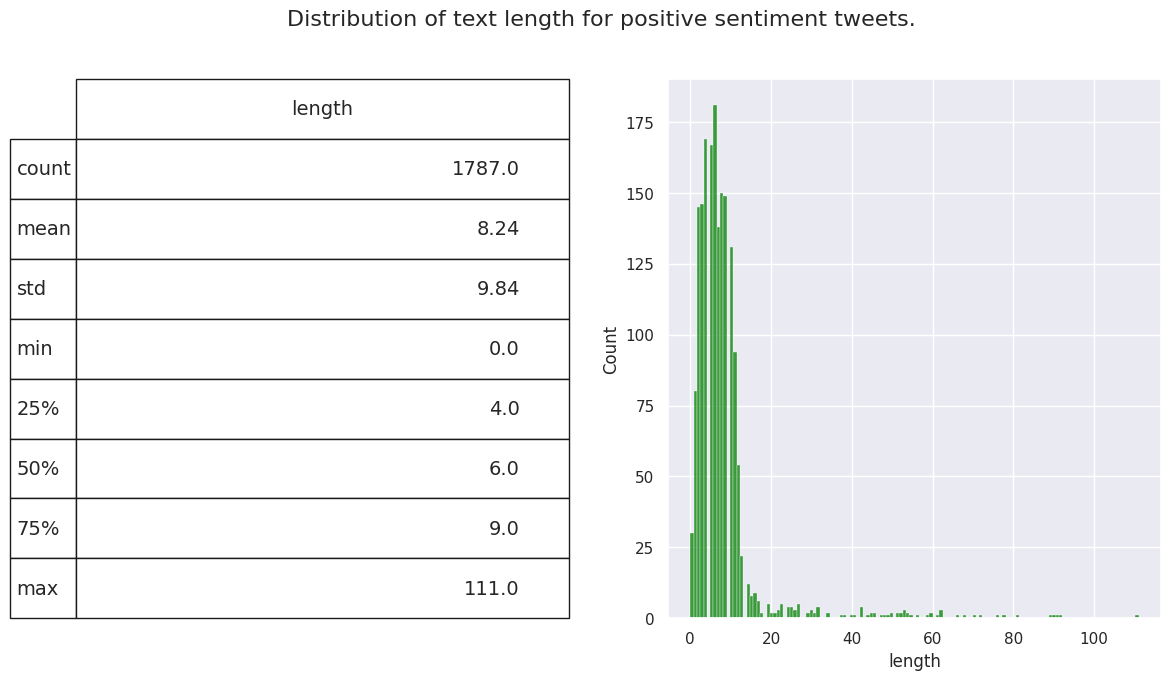

In [6]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.tweet.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df['length'], ax=ax1,color='green')
describe = df.length.describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for positive sentiment tweets.', fontsize=16)

plt.show()

<Axes: xlabel='Suicide', ylabel='count'>

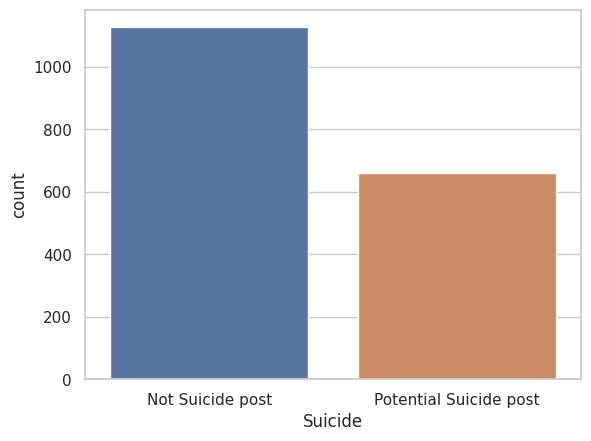

In [7]:
sns.set_theme(style="whitegrid")
sns.countplot(x=df["Suicide"])

In [8]:
top = Counter([item for sublist in df['short_word'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [11]:
Not_Suicide_post = df[df['Suicide']=='Not Suicide post']
Potential_Suicide_post = df[df['Suicide']=='Potential Suicide post']

In [12]:
top = Counter([item for sublist in Not_Suicide_post['short_word'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Words in Not_Suicide_Post', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [13]:
top = Counter([item for sublist in Potential_Suicide_post['short_word'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Words in Potential_Suicide_post', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

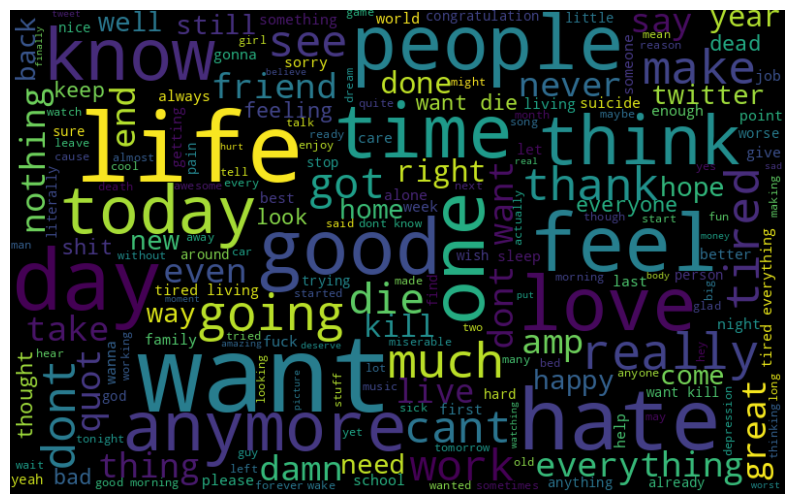

In [14]:
normal_words =' '.join([text for text in df['tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

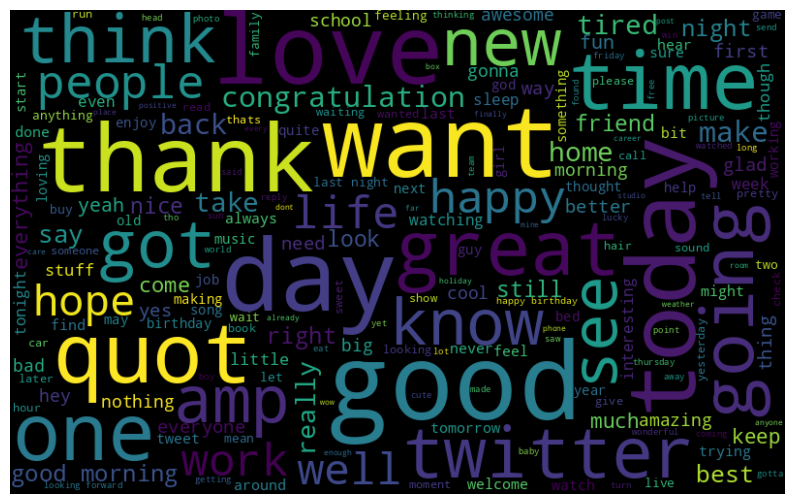

In [15]:
normal_words =' '.join([text for text in df['tweet'][df['Suicide'] == 'Not Suicide post']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

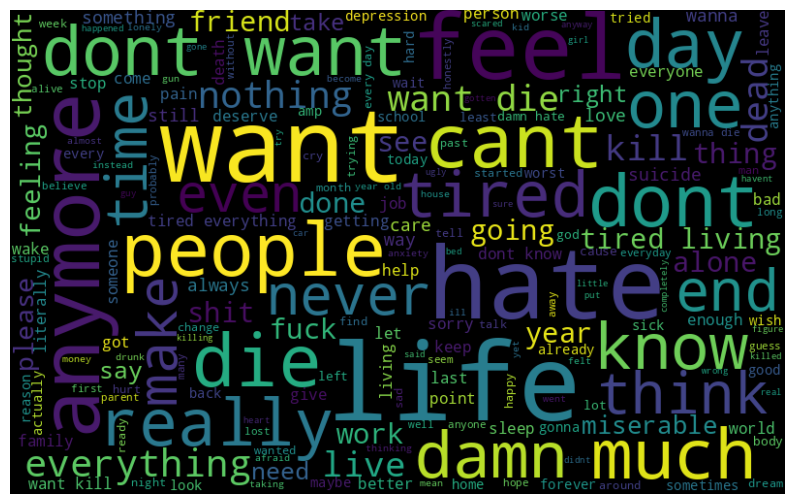

In [16]:
normal_words =' '.join([text for text in df['tweet'][df['Suicide'] == 'Potential Suicide post']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## **Applying N-gram**

In [17]:
x_train, x_test, y_train, y_test = train_test_split(df["tweet"],df["Suicide"], test_size = 0.25, random_state = 42)
count_vect = CountVectorizer(ngram_range=(1, 2))
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)

x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

print (x_train_tfidf.shape,x_test_tfidf.shape, y_train.shape, y_test.shape)

(1340, 11145) (447, 11145) (1340,) (447,)


# **Machine Learning Models**

# **Logistic Regression**

In [18]:
lr = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
lr.fit(x_train_tfidf, y_train)
y_pred1 = lr.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred1)))
print(classification_report(y_test, y_pred1))

Accuracy: 0.8747203579418344
                        precision    recall  f1-score   support

      Not Suicide post       0.85      0.96      0.90       276
Potential Suicide post       0.93      0.73      0.82       171

              accuracy                           0.87       447
             macro avg       0.89      0.85      0.86       447
          weighted avg       0.88      0.87      0.87       447



In [19]:
scores = cross_val_score(lr, x_train_tfidf,y_train, cv=5)
print(accuracy_score(y_test,y_pred1))
print ("Cross-validated scores:", scores)

0.8747203579418344
Cross-validated scores: [0.85820896 0.82462687 0.87686567 0.8358209  0.80970149]


# **Support Vector Machine**

In [20]:
svc = LinearSVC()
svc.fit(x_train_tfidf, y_train)
y_pred2 = svc.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred2)))
print(classification_report(y_test, y_pred2))

Accuracy: 0.8814317673378076
                        precision    recall  f1-score   support

      Not Suicide post       0.88      0.94      0.91       276
Potential Suicide post       0.89      0.79      0.84       171

              accuracy                           0.88       447
             macro avg       0.88      0.86      0.87       447
          weighted avg       0.88      0.88      0.88       447



In [21]:
scores = cross_val_score(svc, x_train_tfidf,y_train, cv=5)
print(accuracy_score(y_test,y_pred2))
print ("Cross-validated scores:", scores)

0.8814317673378076
Cross-validated scores: [0.89552239 0.88432836 0.90671642 0.8880597  0.83208955]


In [22]:
joblib.dump(svc, 'Suicide_SVM.pkl')
#model = joblib.load('Suicide_SVM.pkl')

['Suicide_SVM.pkl']



## **Naive Bayes(Multinomial)**

In [24]:
mnb = MultinomialNB()
mnb.fit(x_train_tfidf, y_train)
y_pred3 = mnb.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred3)))
print(classification_report(y_test, y_pred3))

Accuracy: 0.8747203579418344
                        precision    recall  f1-score   support

      Not Suicide post       0.84      0.99      0.91       276
Potential Suicide post       0.98      0.69      0.81       171

              accuracy                           0.87       447
             macro avg       0.91      0.84      0.86       447
          weighted avg       0.89      0.87      0.87       447



In [26]:
scores = cross_val_score(mnb, x_train_tfidf,y_train, cv=5)
print(accuracy_score(y_test,y_pred3))
print ("Cross-validated scores:", scores)

0.8747203579418344
Cross-validated scores: [0.8619403  0.83955224 0.8880597  0.84701493 0.80223881]


## **Randomforest**


In [27]:
rfc = RandomForestClassifier(n_estimators=300, max_depth=15, random_state=42, class_weight='balanced')
rfc.fit(x_train_tfidf,y_train)
y_pred4 = rfc.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred4)))
print(classification_report(y_test, y_pred4))

Accuracy: 0.8568232662192393
                        precision    recall  f1-score   support

      Not Suicide post       0.83      0.97      0.89       276
Potential Suicide post       0.93      0.67      0.78       171

              accuracy                           0.86       447
             macro avg       0.88      0.82      0.84       447
          weighted avg       0.87      0.86      0.85       447



In [28]:
scores = cross_val_score(rfc, x_train_tfidf,y_train, cv=5)
print(accuracy_score(y_test,y_pred4))
print ("Cross-validated scores:", scores)

0.8568232662192393
Cross-validated scores: [0.89925373 0.85820896 0.89179104 0.88059701 0.85820896]


# **GradientBoostingClassifier**

In [29]:
gbc = GradientBoostingClassifier(n_estimators=1000, max_features='auto', max_depth=4, random_state=1, verbose=1)
gbc.fit(x_train_tfidf, y_train)
y_pred5 = gbc.predict(x_test_tfidf)
print(accuracy_score(y_test, y_pred5))
print(classification_report(y_test, y_pred5))

      Iter       Train Loss   Remaining Time 
         1           1.2409           25.43s
         2           1.1840           26.25s
         3           1.1378           25.60s
         4           1.0990           25.07s
         5           1.0606           24.97s
         6           1.0309           24.79s
         7           0.9953           25.48s
         8           0.9688           26.18s
         9           0.9469           26.26s
        10           0.9202           26.23s
        20           0.7760           21.62s
        30           0.6908           19.38s
        40           0.6279           18.06s
        50           0.5771           17.17s
        60           0.5343           16.55s
        70           0.4980           16.02s
        80           0.4659           15.64s
        90           0.4379           15.20s
       100           0.4188           14.70s
       200           0.2753           11.93s
       300           0.2007            9.95s
       40

In [30]:
scores = cross_val_score(gbc, x_train_tfidf,y_train, cv=5)
print(accuracy_score(y_test,y_pred5))
print ("Cross-validated scores:", scores)

      Iter       Train Loss   Remaining Time 
         1           1.2437           52.89s
         2           1.1883           49.44s
         3           1.1432           48.07s
         4           1.1051           47.29s
         5           1.0720           47.98s
         6           1.0361           47.81s
         7           1.0091           47.62s
         8           0.9780           47.35s
         9           0.9571           47.12s
        10           0.9342           47.32s
        20           0.7823           46.25s
        30           0.6876           45.15s
        40           0.6231           47.71s
        50           0.5696           49.33s
        60           0.5285           45.03s
        70           0.4909           41.66s
        80           0.4590           39.00s
        90           0.4353           36.78s
       100           0.4110           34.96s
       200           0.2667           25.35s
       300           0.1890           20.42s
       40

## **Ensemble Classifier**

In [31]:
mnb = MultinomialNB()
rfc= RandomForestClassifier(n_estimators=1000, max_depth=12, random_state=42)
lr = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
svc = SVC(probability=True)
ec=VotingClassifier(estimators=[('Multinominal NB', mnb), ('Random Forest', rfc),('Logistic Regression',lr),('Support Vector Machine',svc)], voting='soft', weights=[1,2,3,4])
ec.fit(x_train_tfidf,y_train)
y_pred6 = ec.predict(x_test_tfidf)
print(accuracy_score(y_test, y_pred6))
print(classification_report(y_test, y_pred6))

0.8881431767337807
                        precision    recall  f1-score   support

      Not Suicide post       0.90      0.92      0.91       276
Potential Suicide post       0.87      0.83      0.85       171

              accuracy                           0.89       447
             macro avg       0.88      0.88      0.88       447
          weighted avg       0.89      0.89      0.89       447



In [32]:
scores = cross_val_score(ec, x_train_tfidf,y_train, cv=5)
print(accuracy_score(y_test,y_pred6))
print ("Cross-validated scores:", scores)

0.8881431767337807
Cross-validated scores: [0.90671642 0.88059701 0.9141791  0.89552239 0.85074627]


In [33]:
mc = count_vect.transform([' i will kill myself'])
m = transformer.transform(mc)
y_pred = ec.predict(m)
print(y_pred)

['Potential Suicide post']


In [34]:
joblib.dump(ec, 'Suicide_Ensemble.pkl')
#model = joblib.load('Suicide_Ensemble.pkl')

['Suicide_Ensemble.pkl']

# **Comparison Between ML Models**

In [38]:
Comparison_unibi = pd.DataFrame({'Logistic Regression': [accuracy_score(y_test,y_pred1)*100,f1_score(y_test,y_pred1,average='macro')*100,recall_score(y_test, y_pred1,average='micro')*100,precision_score(y_test, y_pred1,average='micro')*100],
                            'SVM':[accuracy_score(y_test,y_pred2)*100,f1_score(y_test,y_pred2,average='macro')*100,recall_score(y_test, y_pred2,average='micro')*100,precision_score(y_test, y_pred2,average='micro')*100],
                           'Naive Bayes':[accuracy_score(y_test,y_pred3)*100,f1_score(y_test,y_pred3,average='macro')*100,recall_score(y_test, y_pred3,average='micro')*100,precision_score(y_test, y_pred3,average='micro')*100],
                           'Random Forest':[accuracy_score(y_test,y_pred4)*100,f1_score(y_test,y_pred4,average='macro')*100,recall_score(y_test, y_pred4,average='micro')*100,precision_score(y_test, y_pred4,average='micro')*100],
                           'GradientBoosting':[accuracy_score(y_test,y_pred5)*100,f1_score(y_test,y_pred5,average='macro')*100,recall_score(y_test, y_pred5,average='micro')*100,precision_score(y_test, y_pred5,average='micro')*100],
                           'Ensembled':[accuracy_score(y_test,y_pred6)*100,f1_score(y_test,y_pred6,average='macro')*100,recall_score(y_test, y_pred6,average='micro')*100,precision_score(y_test, y_pred6,average='micro')*100]
                          })

In [ ]:
print ('Comparison using uni-bi-gram(1,2)')
Comparison_unibi.rename(index={0:'Accuracy',1:'F1_score', 2: 'Recall',3:'Precision'}, inplace=True)
Comparison_unibi.head()

Comparison using uni-bi-gram(1,2)


,Logistic Regression,SVM,Naive Bayes,Random Forest,GradientBoosting,Ensembled,Adaboost
Accuracy,90.311987,91.461412,90.476190,86.042693,89.326765,91.133005,90.968801
F1_score,90.189676,91.380512,90.408928,85.517241,89.183865,91.075228,90.810221
Recall,90.311987,91.461412,90.476190,86.042693,89.326765,91.133005,90.968801
Precision,90.311987,91.461412,90.476190,86.042693,89.326765,91.133005,90.968801
